In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import keras

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns
import warnings

a parte n_input e n_output sono tutti hyperparameters da definire con validation set

In [2]:
from IPython.utils.py3compat import no_code
n_input = 300 #len of vector
n_hidden1 = n_input/2
n_code = n_hidden1/2 #codings
n_hidden2 = n_hidden1
n_output = n_input


import data

In [3]:
os.chdir('/content/')
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
dfs = []
for data_file in csv_files :
  print("Read "+data_file)
  df = pd.read_csv(data_file)
  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)

df = df.drop(columns= 'Unnamed: 0')
del(dfs)

Read DoubleMuonDigiListOutput_9.csv
Read DoubleMuonDigiListOutput_3.csv
Read DoubleMuonDigiListOutput_2.csv
Read DoubleMuonDigiListOutput_8.csv
Read DoubleMuonDigiListOutput_0.csv
Read DoubleMuonDigiListOutput_7.csv
Read DoubleMuonDigiListOutput_5.csv
Read DoubleMuonDigiListOutput_6.csv
Read DoubleMuonDigiListOutput_4.csv
Read DoubleMuonDigiListOutput_1.csv


split in train, validation and test samples -> remove validation, use validation_split attribute of training method

In [14]:
train_events = round(len(df)*.7)
validation_events = round(len(df)*.2)
test_events = len(df)-(train_events+validation_events)

x_train = df.iloc[:train_events, :]
x_validation = df.iloc[train_events:(train_events+validation_events), :]
x_test = df.iloc[(train_events+validation_events):, :]
#x_test = df.iloc[train_events:, :]


In [16]:
print(len(df))
print("train sample")
print(train_events)
print(len(x_train))
print("validation sample")
print(validation_events)
print(len(x_validation))
print("test sample")
#print(len(df)-train_events-validation_events)
print(len(x_test))


98677
train sample
69074
69074
validation sample
19735
19735
test sample
9868


In [ ]:
x_train.iloc[0].to_numpy().reshape((4,75))

array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

In [ ]:
x_train.to_numpy()[0]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
def plot_input(n, dims):
    # number of example to show
    plt.figure(figsize=(80, 36))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_train.iloc[i].to_numpy().reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

    plt.show()

def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    plt.figure(figsize=(40, 18))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test.iloc[i].to_numpy().reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

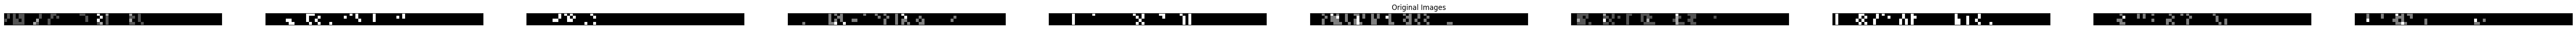

In [11]:
plot_input(10, (4, 75))

In [41]:
input_img = x_train.shape[1]
#define separately encoder and decoder to extract encoder for classification after training
encoder = models.Sequential([
    layers.InputLayer(input_shape=(input_img,)),
    layers.Dense(n_hidden1, activation='relu'),
    layers.Dense(n_code, activation='relu'),
])

# Decoder
decoder = models.Sequential([
    layers.Dense(n_hidden1, activation='relu', input_shape=(n_code,)),

    layers.Dense(input_img, activation='sigmoid'),
])

# Autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder,
])

l_rate = 0.006 # 0.001 default value
opt = keras.optimizers.Adam(learning_rate=l_rate)
autoencoder.compile(optimizer=opt, loss='MSE')

#autoencoder.compile(optimizer='adam', loss='MSE')

#Adam -> adaptative moment optimizer= exponentially decaying average of past gradients and tracks exponentially decaying average of past squared gradients

#binary cross entropy = penalize model when predicts low probability for target class-> nel mio caso low probability for what?, ma ok usato per measure how well a set of estimated class probabilities matches the target class

In [ ]:
n_epochs = 700
keras.utils.set_random_seed(42)
history = autoencoder.fit(x_train, x_train, batch_size= 500, epochs=n_epochs, validation_split = 0.3)

Epoch 1/700
97/97 [==============================] - 1s 9ms/step - loss: 0.0735 - val_loss: 0.0758
Epoch 2/700
97/97 [==============================] - 1s 6ms/step - loss: 0.0735 - val_loss: 0.0757
Epoch 3/700
97/97 [==============================] - 1s 7ms/step - loss: 0.0736 - val_loss: 0.0758
Epoch 4/700
97/97 [==============================] - 1s 10ms/step - loss: 0.0736 - val_loss: 0.0758
Epoch 5/700
97/97 [==============================] - 1s 8ms/step - loss: 0.0735 - val_loss: 0.0761
Epoch 6/700
97/97 [==============================] - 1s 8ms/step - loss: 0.0736 - val_loss: 0.0759
Epoch 7/700
97/97 [==============================] - 1s 7ms/step - loss: 0.0736 - val_loss: 0.0762
Epoch 8/700
97/97 [==============================] - 1s 6ms/step - loss: 0.0735 - val_loss: 0.0757
Epoch 9/700
97/97 [==============================] - 1s 6ms/step - loss: 0.0736 - val_loss: 0.0758
Epoch 10/700
97/97 [==============================] - 1s 6ms/step - loss: 0.0735 - val_loss: 0.0759
Epoch 11

In [44]:
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 25)                32625     
                                                                 
 sequential_7 (Sequential)   (None, 300)               32900     
                                                                 
Total params: 65525 (255.96 KB)
Trainable params: 65525 (255.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


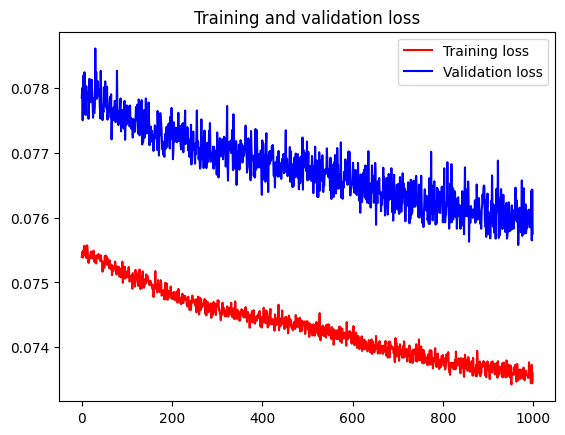

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

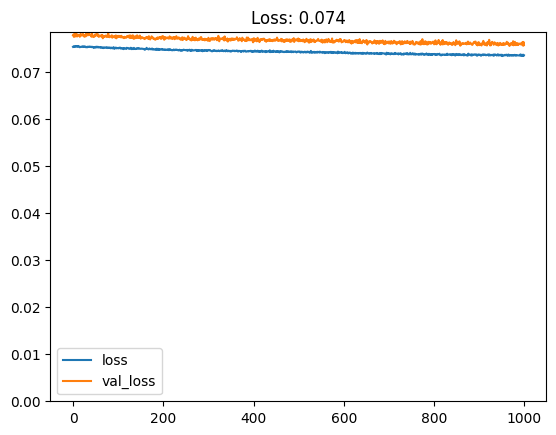

In [55]:
plot_loss(history)

309/309 [==============================] - 1s 2ms/step


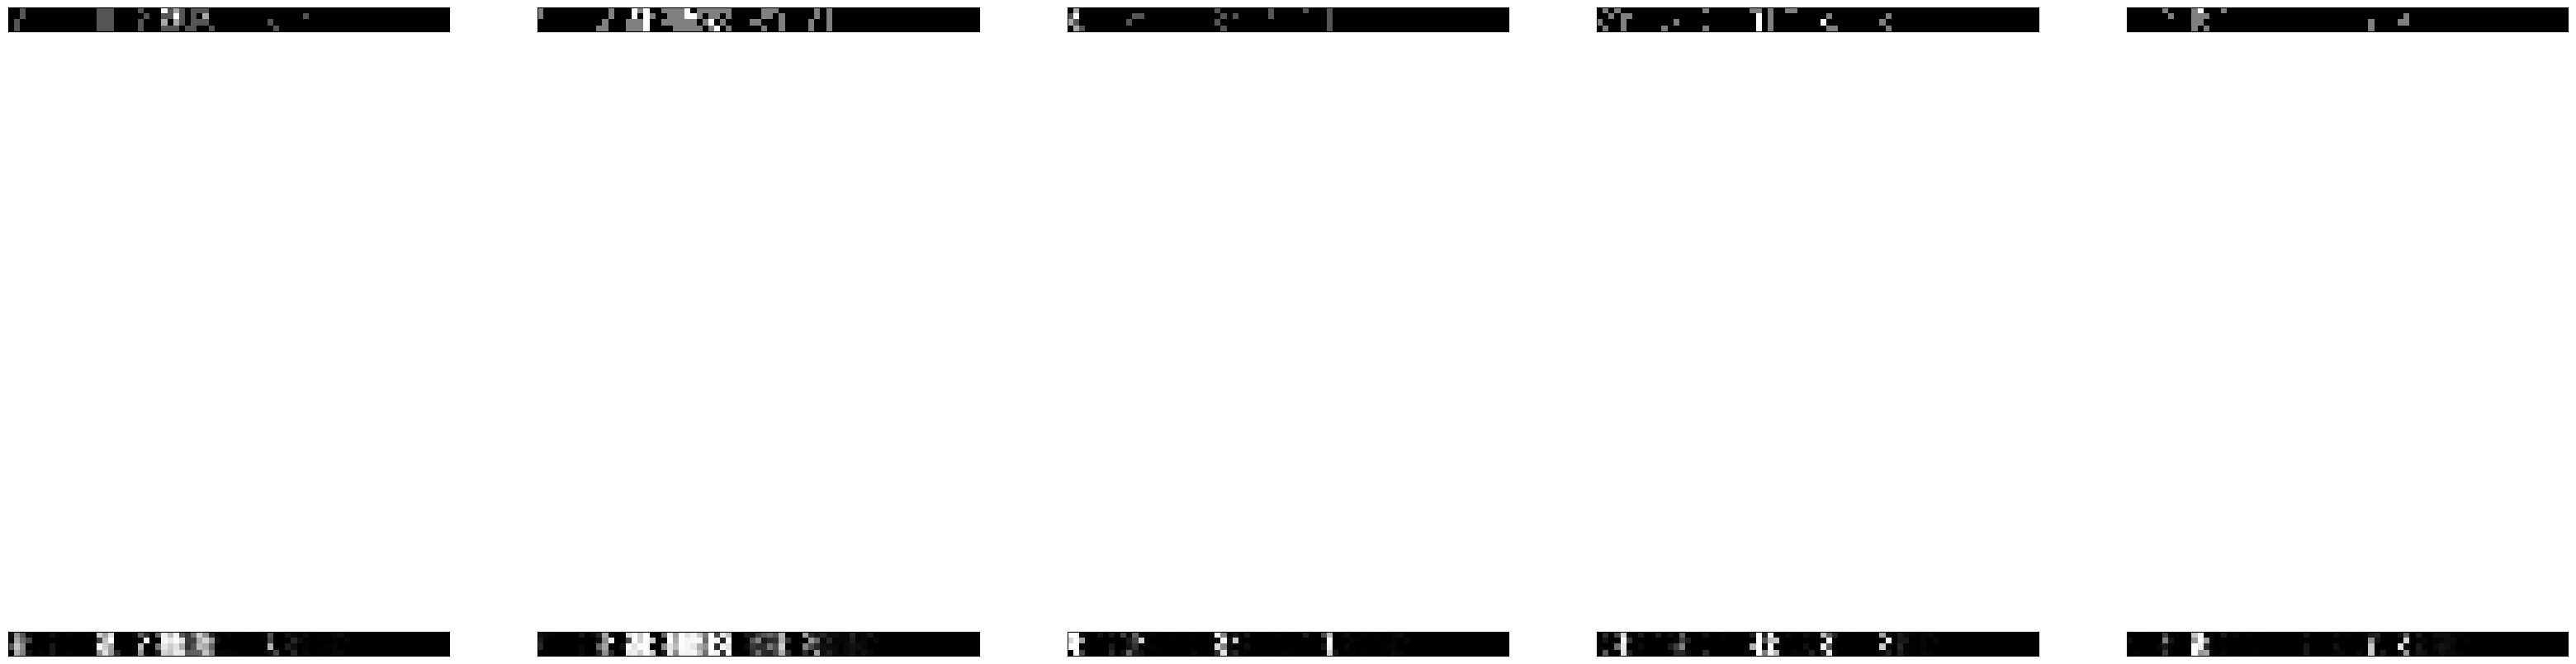

In [48]:
plot_autoencoder_outputs(autoencoder, 5, (4, 75))

save the model after training

In [22]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [23]:
autoencoder.save('JetDTsAutoencoder')

use validation subset to tune "high error" on which set the distinction between jet and non jet like events

617/617 [==============================] - 1s 2ms/step


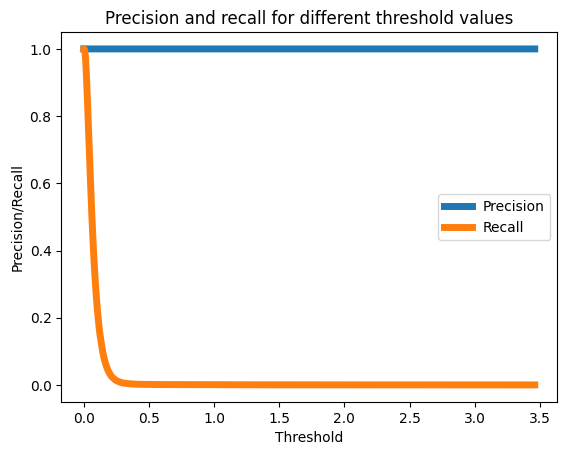

In [31]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
x_predictions = autoencoder.predict(x_validation)
mse = np.mean(np.power(x_validation - x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class':1})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [49]:
test_eval = autoencoder.evaluate(x_test, x_test)

309/309 [==============================] - 1s 2ms/step - loss: 0.0785


Use the trained model encoder part for classification

In [52]:
# Extract the encoder part for classification
from tensorflow.keras import layers, models
encoded_input = layers.Input(shape=(n_code,))
classifier_output = layers.Dense(n_input, activation='sigmoid')(encoded_input)
classifier_model = models.Model(encoded_input, classifier_output)

# Compile the classifier model
classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier_history = classifier_model.fit(encoder.predict(x_train), x_train, epochs=50, batch_size=32, validation_split=0.2)

2159/2159 [==============================] - 3s 1ms/step
Epoch 1/50
1727/1727 [==============================] - 7s 4ms/step - loss: 0.2775 - accuracy: 0.0475 - val_loss: 0.2164 - val_accuracy: 0.0529
Epoch 2/50
1727/1727 [==============================] - 6s 4ms/step - loss: 0.2022 - accuracy: 0.0524 - val_loss: 0.1938 - val_accuracy: 0.0486
Epoch 3/50
1727/1727 [==============================] - 6s 4ms/step - loss: 0.1883 - accuracy: 0.0492 - val_loss: 0.1850 - val_accuracy: 0.0455
Epoch 4/50
1727/1727 [==============================] - 6s 3ms/step - loss: 0.1813 - accuracy: 0.0478 - val_loss: 0.1797 - val_accuracy: 0.0444
Epoch 5/50
1727/1727 [==============================] - 8s 4ms/step - loss: 0.1766 - accuracy: 0.0468 - val_loss: 0.1752 - val_accuracy: 0.0444
Epoch 6/50
1727/1727 [==============================] - 7s 4ms/step - loss: 0.1727 - accuracy: 0.0463 - val_loss: 0.1715 - val_accuracy: 0.0437
Epoch 7/50
1727/1727 [==============================] - 8s 5ms/step - loss: 0.1

KeyboardInterrupt: 

In [ ]:
loss = classifier_history.history['loss']
val_loss = classifier_history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()